<a href="https://colab.research.google.com/github/nancymary-web/Project1/blob/master/Copy_of_2_ANN_on_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_pickle("/2_CarPricesData.pkl")

In [6]:
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [7]:
df.isnull().sum()

,0
Age,0
KM,0
Weight,0
HP,0
MetColor,0
CC,0
Doors,0
Price,0


In [8]:
df.groupby("Doors")['Weight'].max()

,Weight
Doors,
2,1115.0
3,1320.0
4,1160.0
5,1320.0


In [9]:
df.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age', 'KM', 'Weight', 'HP', 'CC']] = sc.fit_transform(df[['Age', 'KM', 'Weight', 'HP', 'CC']])
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.0,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.0,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.0,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.0,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.0,3,13750


<Axes: xlabel='Age'>

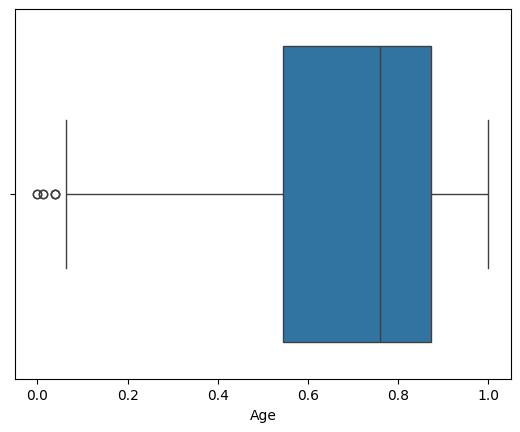

In [11]:
# Handling outliers
# Task

import seaborn as sns

sns.boxplot(x='Age',data=df)

In [12]:
# Spiting data
X = df.iloc[:,:-1]
y = df['Price']

In [13]:
X.shape

(1435, 7)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)


In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 7)
(359, 7)
(1076,)
(359,)


In [16]:
1076/20

53.8

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 100.9 KB


In [22]:
df['Price'] = df['Price'].astype('float32')

In [21]:
df['Price'].dtype

dtype('float32')

In [24]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   float32
dtypes: float32(1), float64(5), int64(2)
memory usage: 95.3 KB


In [26]:
!pip install keras

In [27]:
!pip install tensorflow

In [28]:
# Model building
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import r2_score

In [29]:
x_train

,Age,KM,Weight,HP,MetColor,CC,Doors
579,0.569620,0.135885,0.250000,0.333333,1,0.428571,5
356,0.481013,0.101737,0.187500,0.333333,1,0.428571,4
171,0.088608,0.045264,0.406250,0.333333,1,0.428571,5
1207,0.898734,0.358364,0.109375,0.333333,0,0.428571,4
911,0.797468,0.239240,0.234375,0.333333,1,0.428571,5
...,...,...,...,...,...,...,...
1096,0.936709,0.516047,0.156250,0.333333,0,0.428571,3
1131,0.936709,0.440327,0.156250,0.333333,1,0.428571,3
1295,1.000000,0.294236,0.109375,0.333333,1,0.428571,4
861,0.810127,0.265964,0.218750,0.333333,0,0.428571,5


In [30]:
## Regression
# last layer should have one neuron
# and that one neuron should have linear activation function/No activation
# loss function is mean square error

## Binary class classification
# last layer should have one neuron
# that neuron should have sigmoid activation function
# Loss function is Binary Crossentropy

## Multiclass classification
# last layer should have no of neurons equal to no. of classes to be predicted
# and those neurons should have softmax activation function
# Loss function is Categorical crossentropy/Sparse categorical crossentropy

In [31]:
x_train.shape

(1076, 7)

In [32]:
# 1076/20 = 53.8
# 1 epoch means when all the data points has been used in training
# since we are sending 20 datapoints in one batch, it will require approx 54
# batches to exhuast all the training data points that means 1 epoch.

In [33]:
# Model building
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import r2_score

In [34]:
model = Sequential()
model.add(Dense(units=20, input_dim=7,kernel_initializer='he_uniform', activation='relu' ) )
model.add(Dense(units = 32, kernel_initializer='he_uniform', activation='relu' ) )
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu' ))
model.add(Dense(units=1,kernel_initializer='he_uniform' ))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics. R2Score() ])
model_history = model. fit(x_train,y_train, validation_split=0.2,batch_size=20, epochs=10, verbose=1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 134421504.0000 - r2_score: -8.5516 - val_loss: 116829856.0000 - val_r2_score: -8.7344
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 128014752.0000 - r2_score: -8.9016 - val_loss: 115959344.0000 - val_r2_score: -8.6618
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 130572560.0000 - r2_score: -8.7244 - val_loss: 113029824.0000 - val_r2_score: -8.4177
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 124243648.0000 - r2_score: -8.8701 - val_loss: 105050736.0000 - val_r2_score: -7.7529
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 112476112.0000 - r2_score: -8.5473 - val_loss: 88247864.0000 - val_r2_score: -6.3529
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 97874688.0000 - r2_score: -5.7209 - val_loss: 62104504.0000 - val_r2_score: -4.1746
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 63150360.0000 - r2_score: -3.8566 - val_loss: 33761500.0000 - val_r2_score: -1.8

In [35]:
# Do EDA and domain analysis
# Check if you have outliers
# Try other scaling option
# Increase the hidden layers
# train for more epochs---- 100

In [36]:
y_test = y_test.astype("float32")

In [37]:
model.evaluate(x_test,y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12499779.0000 - r2_score: -0.1080


[14232620.0, -0.08705317974090576]

In [39]:
y_pred=model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [40]:
y_pred   # predicted car price

array([[ 9286.1045],
       [12699.67  ],
       [11741.617 ],
       [ 9249.018 ],
       [ 8471.24  ],
       [12109.174 ],
       [10098.725 ],
       [ 9405.392 ],
       [ 8387.693 ],
       [ 8291.37  ],
       [12943.657 ],
       [ 9308.852 ],
       [12323.1045],
       [ 8288.748 ],
       [11834.085 ],
       [10982.525 ],
       [11900.953 ],
       [12304.06  ],
       [11003.821 ],
       [ 8386.478 ],
       [10773.948 ],
       [11463.011 ],
       [11718.685 ],
       [ 7522.342 ],
       [12177.363 ],
       [12195.109 ],
       [12167.579 ],
       [10082.681 ],
       [11799.7   ],
       [11294.1045],
       [ 9460.165 ],
       [12170.923 ],
       [11689.797 ],
       [ 9197.167 ],
       [ 8139.6807],
       [12950.203 ],
       [10964.395 ],
       [ 8200.258 ],
       [11714.155 ],
       [ 8089.686 ],
       [11039.155 ],
       [ 9258.453 ],
       [ 9326.024 ],
       [ 8390.967 ],
       [12646.876 ],
       [11101.443 ],
       [ 8435.354 ],
       [ 8458

In [41]:
y_test  # actual price of the car

,Price
753,9950.0
858,7995.0
630,7500.0
1412,9950.0
975,8950.0
...,...
670,5950.0
127,16500.0
713,9500.0
293,12295.0


In [44]:
x_test.iloc[0]

,753
Age,0.734177
KM,0.330985
Weight,0.203125
HP,0.333333
MetColor,1.000000
CC,0.428571
Doors,3.000000


In [ ]:
#24.0 4711 1165.0 90 1 2000.0 3 13950

In [49]:
from sklearn.preprocessing import minmax_scale
sc = MinMaxScaler()
# df[['Age', 'KM', 'Weight', 'HP', 'CC']] = sc.fit_transform(df[['Age', 'KM', 'Weight', 'HP', 'CC']])
df.head()
y_mod=sc.fit_transform([[30.0,50000,1300,90,0,2000,4]])

In [53]:
y_mod.shape

(1, 7)

In [54]:
y_custom = model.predict(y_mod)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [55]:
y_custom

array([[1079.0695]], dtype=float32)